<a id="DE"></a>
# Data Extraction

<a id="WS"></a>
## Web Scraping

In [2]:
from app_store_scraper import AppStore
from google_play_scraper import reviews
import csv
import pandas as pd

In [ ]:
from google_play_scraper import Sort, reviews_all

In [ ]:
result = reviews_all(
    'com.ril.ajio',
    sleep_milliseconds=0.010, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= None # defaults to None(means all score)
)

result = pd.DataFrame(result)

ajio_ps = pd.DataFrame()
ajio_ps['reviews']=result['content']
ajio_ps['score']= result['score']

In [ ]:
from app_store_scraper import AppStore

In [ ]:
ajio = AppStore(country='us', app_name='ajio', app_id=1113425372)
results = ajio.review(sleep=0.010)

results = pd.DataFrame(ajio.reviews)

ajio_as = pd.DataFrame()
ajio_as['reviews'] = results['review']
ajio_as['score'] = results['rating']

2023-04-17 20:35:50,698 [INFO] Base - Initialised: AppStore('us', 'ajio', 1113425372)
2023-04-17 20:35:50,700 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/ajio/id1113425372
2023-04-17 20:35:53,218 [INFO] Base - [id:1113425372] Fetched 63 reviews (63 fetched in total)


In [ ]:

reviews_df = pd.concat([ajio_ps, ajio_as], ignore_index=True)

reviews_df.to_csv('ajio_reviews.csv', index=False)

In [4]:
df=pd.read_csv('E:/Capstone_1/ajio_reviews.csv')
df.head()

,reviews,score
0,Offers and products seems good while we browsi...,1
1,Nice shopping experience with one dissatisfact...,4
2,User interface is not good. Most of the times ...,1
3,Scrap the last update and bring the older vers...,1
4,I installed this app just to write this review...,1


<a id="Dc"></a>
##  Data Check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84240 entries, 0 to 84239
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  84240 non-null  object
 1   score    84240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

reviews    0
score      0
dtype: int64

In [7]:
df['score'].value_counts()

1    43323
5    22096
4     8236
3     5461
2     5124
Name: score, dtype: int64

<a id="SS"></a>
## Score to Sentiment

In [8]:
def sentiment(df):
    df['sentiment']='-'
    df.loc[df['score']<=2,'sentiment']='negative'
    df.loc[df['score']==3,'sentiment']='neutral'
    df.loc[df['score']>=4,'sentiment']='positive'
    
    df = pd.get_dummies(df,columns=['sentiment']).reset_index(drop=True).drop(columns=['score'])
    return df

In [9]:
df = sentiment(df)

In [10]:
df.head()

,reviews,sentiment_negative,sentiment_neutral,sentiment_positive
0,Offers and products seems good while we browsi...,1,0,0
1,Nice shopping experience with one dissatisfact...,0,0,1
2,User interface is not good. Most of the times ...,1,0,0
3,Scrap the last update and bring the older vers...,1,0,0
4,I installed this app just to write this review...,1,0,0


<a id="TP"></a>
# 5 - Text Processing 

<a id="RHTML"></a>
## 5.1 - Lowercase and Remove HTML

For lowercase and remove the html as in almost all of the nexts functions we will use the Regular Expressions.

In [11]:
import re

In [12]:
TAG_RE = re.compile(r'<[^>]+>')

def re_tags(text_list): #define remove tag funtion
    return [TAG_RE.sub('', str(word)).lower() for word in text_list]

<a id="RAC"></a>
## 5.2 - Removing Accented Characters

For remove the accented characters we will use the module and unidecode

In [13]:
import unidecode

In [14]:
def re_accented_char(text_list):
   
    return [unidecode.unidecode(word.encode().decode('utf-8')) for word in text_list]

<a id="EC"></a>
## 5.3 - Extended Contractions 

In [15]:
def ex_contractions(text_list):
    result=[]
    for word in text_list:
        # replace contracting withoutsignal
        word = word.replace("wont","won't")
        word = word.replace("cant","can't")
        word = word.replace("its","it's")
        word = word.replace("youre","you're")
        word = word.replace("hes","he's")
        word = word.replace("shes","she's")
        word = word.replace("its","it's")
        word = word.replace("weare","we're")
        word = word.replace("theyre","they're")

        # specific
        word = re.sub(r"won\'t", "will not", str(word))
        word = re.sub(r"can\'t", "can not", str(word))

        # general
        word = re.sub(r"n\'t", " not", str(word))
        word = re.sub(r"\'re", " are", str(word))
        word = re.sub(r"\'s", " is", str(word))
        word = re.sub(r"\'d", " would", str(word))
        word = re.sub(r"\'ll", " will", str(word))
        word = re.sub(r"\'t", " not", str(word))
        word = re.sub(r"\'ve", " have", str(word))
        word = re.sub(r"\'m", " am", str(word))
        result.append(word)
    return result

<a id="RSC"></a>
## 5.4 - Removing Special Characters

In [16]:
def re_special_chars(text_list):
    return [re.sub("[^a-zA-Z0-9]"," ",word) for word in text_list]

<a id="L"></a>
## 5.5 - Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer 

In [18]:
def lemmatize_text(text_list):
    wnl = WordNetLemmatizer()
    lemmatizer_sentence = []  
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        lemmatizer_sentence.append(wnl.lemmatize(word,'v'))
        lemmatizer_sentence.append(" ")
    
    return("".join(lemmatizer_sentence))

<a id="RSW"></a>
## 5.6 - Removing Stop Words

In [19]:
import nltk

In [20]:
from nltk.corpus import stopwords

In [21]:
def stopwords_text(text_list):
    stop = stopwords.words('english')
    sentence_without = []
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        if word not in stop:
            sentence_without.append(word)
            sentence_without.append(" ")
            
    return("".join(sentence_without))

<a id="CEW"></a>
## 5.7 - Checking If Is An English Word

In [22]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
words=set(nltk.corpus.words.words())

def word_check(text_list):
    result=[]
    for word in text_list:
        if word.lower() in words:
            result.append(word)
    return result

<a id="RDDWS"></a>
## 5.8 -  Removing Digits And Duplicates White Spaces

In [24]:
def re_whitespaces(text_list): 
    result=[]
    for word in text_list:
        word=(re.sub(r'\d','dig',str(word))) #remove numbers 
        word = (re.sub(r'\s+',' ', str(word))) #remove duplicates white spacces
        result.append(word)
    return result

In [25]:
# Removing blank comments
df = df[df['reviews']!='']

<a id="Pipeline"></a>
# 6 - Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X

In [28]:
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [self.text_stopwords(comment) for comment in X]

In [29]:
class LemmatizeProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, Lemmatize):
        self.Lemmatizer = Lemmatize
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.Lemmatizer(comment) for comment in X]

Now we are going to define a dictionary for all the regular expressions functions and then define the text preprocessing pipeline with the classes above the defined.

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
# Defining regex transformers to be applied
regex_transformers = {
    'remove_tags': re_tags,
    'remove_accents': re_accented_char,
    'decontracted': ex_contractions,
    're_sc': re_special_chars,
    'whitespaces': re_whitespaces
}

# Building a text prep pipeline
text_prep_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords_text)),
    ('lemmatize', LemmatizeProcess(lemmatize_text)),
])

Now we can apply the pipeline into the reviews column.

In [32]:
df['reviews'] = text_prep_pipeline.fit_transform(df[df.columns[:1]].values)

<a id="Plot"></a>
# 7 - Plot

For a good understanding of the Ajio reviews we are going to plot the text in two different ways.
 
   * First we will plot the distribution of the sentiments using pie graph express plot from plotly.  
   * The second plot  is a bar plot for the n-gram, which is a sequence of n words most common shown together. We will plot the 1 grams, 2 grams, 3 grams and 4 grams for each sentiment.

<a id="SD"></a>
## 7. 1 - Sentiment Distribution

To plot the distribution of the sentiments in our df we will use the main df to plot the total of each sentiment in a pie graph using the library plotly.express. 

In [33]:
import plotly.express as px

In [34]:
total = pd.DataFrame(df[df.columns[1:]].sum()).rename(columns={0:'Total'})

In [35]:
fig = px.pie(total,values='Total',names=total.index)
fig.show()

As expected is a very unbalanced data frame, since we define 2 scores (1 and 2) for negative and 2 scores for positive (4 and 5) and just one score ( 3 ) for neutral sentiments. Knowing that, we are going to balance the df in later actions before applying the neural networking.
 


<a id="NGP"></a>
## 7.3 - N_Gram Plot

 
 That is a very nice way to understand the most comuns topics per sentiment. To do that we will use the module CountVectorizer from sklearn feature_extraction text library. 
 It might seem a little bit of a mess at first look but it's not.
     We builded a function that counted the 1,2,3 and 4 grams per sentiment and another function to define the dfs per sentiment calling the first function.

 Then we will end up with amazon_results df that contain a list of 12 dfs. 
    
   * Mono-gram - positive neutral and negative.
   * Bi-gram - for positive neutral and negative.
   * Tri-gram - for positive neutral and negative.
   * Tetra-gram - for positive neutral and negative.

Then we will use subplot to plot the top 5 most comuns n-grams for each sentiment.

     

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [37]:
def ngram_results(df):
    
    df_1=df[df['sentiment_positive']==1]
    df_2=df[df['sentiment_neutral']==1]
    df_3=df[df['sentiment_negative']==1]
    
    
    def uni_bi_tri(df_pos,df_neu,df_neg):
        
        #pos
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
       
        #neu
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        #neg
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        results=[result_mono_pos,result_bi_pos,result_tri_pos,result_tetra_pos,
                 result_mono_neu,result_bi_neu,result_tri_neu,result_tetra_neu,
                 result_mono_neg,result_bi_neg,result_tri_neg,result_tetra_neg]
        
        return results
    

    
    return uni_bi_tri(df_1,df_2,df_3)



In [39]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [38]:
ajio_results = ngram_results(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\3692615522.py:12: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\3692615522.py:17: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\3692615522.py:22: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookup

In [40]:
def rename_index(dflist):

    #pos
    df_mono_pos=pd.DataFrame(dflist[0]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_pos=pd.DataFrame(dflist[1]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_pos=pd.DataFrame(dflist[2]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_pos=pd.DataFrame(dflist[3]).reset_index().rename(columns={'index':'Tetra_Pos'})
    #neu
    df_mono_neu=pd.DataFrame(dflist[4]).reset_index().rename(columns={'index':'Mono_Neu'})
    df_bi_neu=pd.DataFrame(dflist[5]).reset_index().rename(columns={'index':'Bi_Neu'})
    df_tri_neu=pd.DataFrame(dflist[6]).reset_index().rename(columns={'index':'Tri_Neu'})
    df_tetra_neu=pd.DataFrame(dflist[7]).reset_index().rename(columns={'index':'Tetra_Neu'})
    #neg
    df_mono_neg=pd.DataFrame(dflist[8]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_neg=pd.DataFrame(dflist[9]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_neg=pd.DataFrame(dflist[10]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_neg=pd.DataFrame(dflist[11]).reset_index().rename(columns={'index':'Tetra_Neg'})
    
    result=[df_mono_pos, df_bi_pos, df_tri_pos, df_tetra_pos,
            df_mono_neu, df_bi_neu, df_tri_neu, df_tetra_neu,
            df_mono_neg, df_bi_neg, df_tri_neg, df_tetra_neg]
    
    return result

In [41]:
ajio_results=rename_index(ajio_results)

In [42]:
#for df in ajio_results:
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.15,
                    column_titles =['Mono-grams','Bi-grams','Tri-grams','Tetra-grams'],
                    row_titles =['Positive','Neutral','Negative'],                  
      
                   )
#for df in ajio_results:
fig.add_trace(go.Bar(
            x = ajio_results[0][ajio_results[0].columns[0]].head(),
            y = ajio_results[0][ajio_results[0].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=1)
fig.add_trace(go.Bar(
            x = ajio_results[1][ajio_results[1].columns[0]].head(),
            y = ajio_results[1][ajio_results[1].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=2)
fig.add_trace(go.Bar(
            x = ajio_results[2][ajio_results[2].columns[0]].head(),
            y = ajio_results[2][ajio_results[2].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=3)
    # neu
fig.add_trace(go.Bar(
            x = ajio_results[3][ajio_results[3].columns[0]].head(),
            y = ajio_results[3][ajio_results[3].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=4)
fig.add_trace(go.Bar(
            x = ajio_results[4][ajio_results[4].columns[0]].head(),
            y = ajio_results[4][ajio_results[4].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=1)
fig.add_trace(go.Bar(
            x = ajio_results[5][ajio_results[5].columns[0]].head(),
            y = ajio_results[5][ajio_results[5].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=2)
    # neg
fig.add_trace(go.Bar(
            x = ajio_results[6][ajio_results[6].columns[0]].head(),
            y = ajio_results[6][ajio_results[6].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=3)
fig.add_trace(go.Bar(
            x = ajio_results[7][ajio_results[7].columns[0]].head(),
            y = ajio_results[7][ajio_results[7].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=4)
fig.add_trace(go.Bar(
            x = ajio_results[8][ajio_results[8].columns[0]].head(),
            y = ajio_results[8][ajio_results[8].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=1)
fig.add_trace(go.Bar(
            x = ajio_results[9][ajio_results[9].columns[0]].head(),
            y = ajio_results[9][ajio_results[9].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=2)
fig.add_trace(go.Bar(
            x = ajio_results[10][ajio_results[10].columns[0]].head(),
            y = ajio_results[10][ajio_results[10].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=3)
fig.add_trace(go.Bar(
            x = ajio_results[11][ajio_results[11].columns[0]].head(),
            y = ajio_results[11][ajio_results[11].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=4)


    
#
fig.update_layout({"showlegend": False},height=900, width=1000)
fig.show()

* Positive app reviews highlight ease of use, love for Ajio shopping, and product quality. 
* Neutral reviews mention areas for improvement like wish lists, Kindle books, and Ajio Smile. 
* Negative reviews focus on recent updates, error messages something go wrong and customer service issues. 
* Improving customer service can enhance the overall app experience.






<a id="Modeling"></a>
# 8 - Modeling

<a id="TTS"></a>
## 8.1 - Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
y =  df[df.columns[1:]].values

In [45]:
X = []

sentences = list(df["reviews"])
for sen in sentences:
    X.append(sen)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<a id="E"></a>
## 8.2 - Embedding

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

maxlen = 200

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

We will be using numpy arrays and GloVe word embeddings to convert text inputs to their numeric counterparts.

In [49]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [51]:
import numpy as np

embeddings_dictionary = dict()
glove_file = open('E:\Capstone_1\glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


<a id="B"></a>
## 8.3 - Balancing

As seen before, the data set is highly unbalanced, to be more precise in the results we will balance the dataset using the imblearn Random OverSampling technique.

In [52]:
print('Negative',pd.DataFrame(y_train).sum()[0])
print('Neutral',pd.DataFrame(y_train).sum()[1])
print('Positve',pd.DataFrame(y_train).sum()[2])

Negative 38779
Neutral 4366
Positve 24247


In [55]:
from imblearn.over_sampling import RandomOverSampler

In [56]:
over = RandomOverSampler()
    
X_ov, y_ov = over.fit_resample(X_train, y_train)

In [57]:
print('Negative',pd.DataFrame(y_ov).sum()[0])
print('Neutral',pd.DataFrame(y_ov).sum()[1])
print('Positve',pd.DataFrame(y_ov).sum()[2])


Negative 38779
Neutral 38779
Positve 38779


<a id="FS"></a>
## 8.4 - Featuring Selection

In order to prevent overfitting we are going to reduce the features of the data frame. To do that we are going to use one of the simplest and most common ways to select relevant features for classification which is to calculate the F-Score for each feature. 
 
The F-Score is calculated using the variance between the features and the variance within each feature. A small F-score usually means that the feature is less important than a feature with a high F-score. We will calculate the F-Score of the features per sentiment using sklearn modules SelectKBest and f_classif to return the ANOVA F-value.
 
 
I highly recommend see the Nils Schlüter [Medium article](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) for more ways to prevent overfitting in Deep Learning Models.


In [58]:
from sklearn.feature_selection import f_classif, SelectKBest

In [59]:
selected_features = [] 
for label in range(0,3):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_ov, pd.DataFrame(y_ov)[label])
    selected_features.append(list(selector.scores_))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199] are constant.

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [ 87  88  89  90  91  92  93  94  95  96  97  9

In [60]:
import matplotlib.pyplot as plt

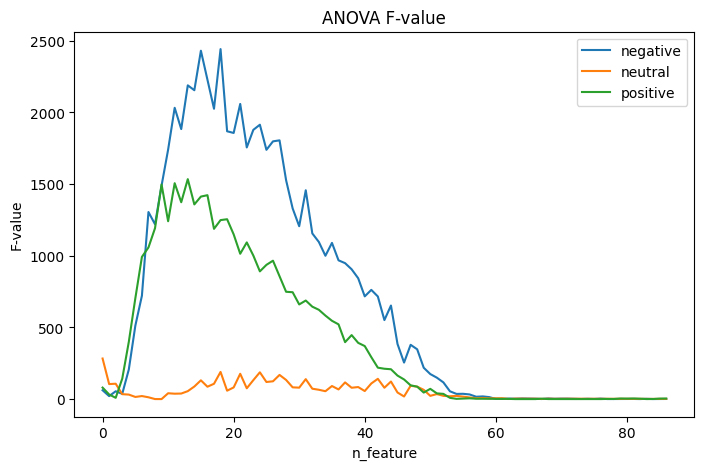

In [61]:
plt.figure(figsize=(8, 5))
plt.plot(selected_features[0])
plt.plot(selected_features[1])
plt.plot(selected_features[2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')


plt.show()

 As seeing, usually the reviews have the highest F-Scores till the feature around 10. After that the F_store is visually decreasing. 
So, we will arbitrarily drop the features after the 20.


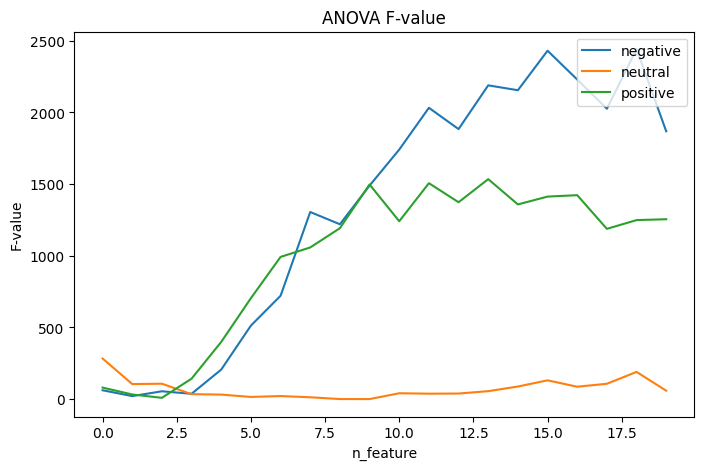

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(pd.DataFrame(selected_features).T[:20][0])
plt.plot(pd.DataFrame(selected_features).T[:20][1])
plt.plot(pd.DataFrame(selected_features).T[:20][2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')

plt.show()

In [63]:
X_ov=X_ov[:,:20]

<a id="EM"></a>
## 8.5 -  Evaluation Metrics

In [64]:
from tensorflow.keras import backend as K

In [65]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [66]:

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [67]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

<a id="NN"></a>
## 8.6 -  Neural Networks

To create a model to predict the text sentiment, we will have one input layer shape 20, the number of features. One Embedding Layer that takes the vocab size and the embedding matrix created before. One Long Short-Term Memory (LSTM) layer with 128 neurons and finely the output layer with 3 neurons since we have 3 labels in the output, Positive, Neutral and Negative.

We are going to use keras model module and keras.layers, Dense, LSTM and Embedding.

For the metrics we will set Accuracy, F1, Precision and Recall that we defined above.


In [68]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding

In [69]:
from keras.layers import Dropout

deep_inputs = Input(shape=(20,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dropout_layer = Dropout(0.2)(LSTM_Layer_1)  # Add dropout with a rate of 0.2
dense_layer_1 = Dense(3, activation='sigmoid')(dropout_layer)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', f1_m, precision_m, recall_m])



Printing the model summary:


In [70]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 embedding (Embedding)       (None, 20, 100)           2152300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 2,269,935
Trainable params: 117,635
Non-trainable params: 2,152,300
_________________________________________________________________
None


Let's train our model with 0.7 of the random oversampling DF. Batch_size 32 and apochs 10. The other 0.3 of the DF will be used for the validation.

In [171]:
history = model.fit(X_ov, y_ov, batch_size=32, epochs=6, verbose=1, validation_split=0.3)

Epoch 1/6
2545/2545 [==============================] - 23s 8ms/step - loss: 0.3889 - acc: 0.7249 - f1_m: 0.7051 - precision_m: 0.7859 - recall_m: 0.6432 - val_loss: 0.5222 - val_acc: 0.6408 - val_f1_m: 0.5987 - val_precision_m: 0.6568 - val_recall_m: 0.5529
Epoch 2/6
2545/2545 [==============================] - 17s 7ms/step - loss: 0.3596 - acc: 0.7524 - f1_m: 0.7403 - precision_m: 0.7900 - recall_m: 0.6983 - val_loss: 0.5310 - val_acc: 0.6362 - val_f1_m: 0.5972 - val_precision_m: 0.6427 - val_recall_m: 0.5598
Epoch 3/6
2545/2545 [==============================] - 17s 7ms/step - loss: 0.3370 - acc: 0.7746 - f1_m: 0.7660 - precision_m: 0.8028 - recall_m: 0.7337 - val_loss: 0.4486 - val_acc: 0.7161 - val_f1_m: 0.7092 - val_precision_m: 0.7283 - val_recall_m: 0.6918
Epoch 4/6
2545/2545 [==============================] - 17s 7ms/step - loss: 0.3100 - acc: 0.7979 - f1_m: 0.7925 - precision_m: 0.8211 - recall_m: 0.7669 - val_loss: 0.4249 - val_acc: 0.7308 - val_f1_m: 0.7233 - val_precision_m

<a id="Results"></a>
# 9 - Results

Now let's plot the results that our model got. First let's plot the history of the metrics that the model got during the 10 epochs in the train and in the validation data set. 
Then we are going to build a table to see the metrics 
achieved in the train and in the test data set and finely we will build a function that put our model in context getting a human comment, appling the text preprocessing and the model to plot the label predicted by our model.


<a id="PH"></a>
## 9.1 -  Plotting History

Now, we are going to use matplotlib again to plot the model History that recorded training and validation metrics for each epoch. The results obtained in history for Loss, Accuracy, Precision, Recall and F1 score for Training in blue and Validation in orange.

### Loss

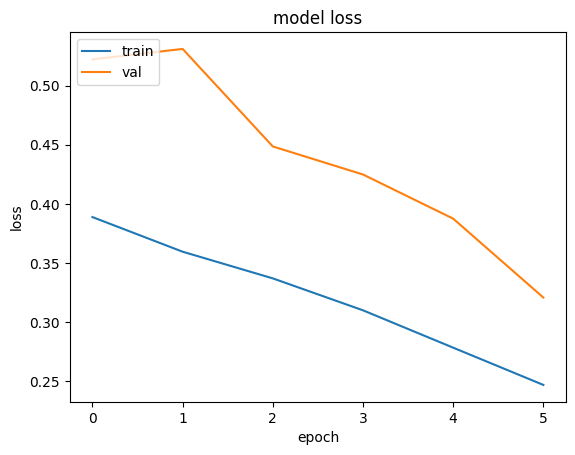

In [172]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

### Accuracy

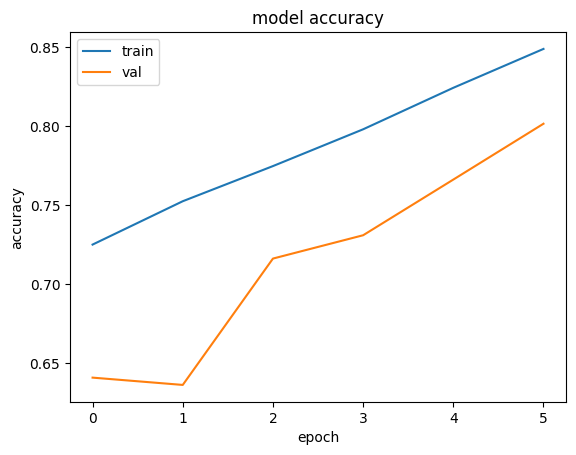

In [173]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


### Precision

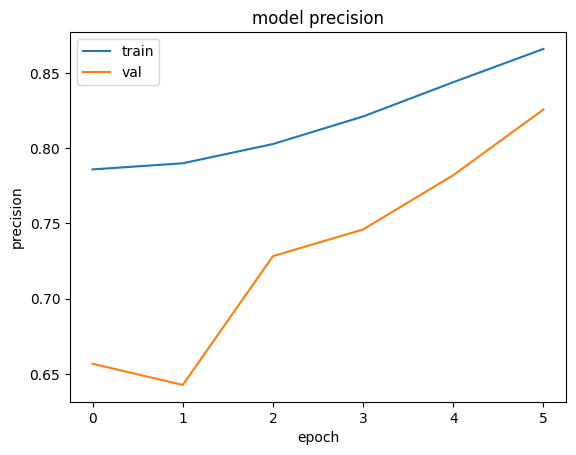

In [174]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])

plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


### Recall

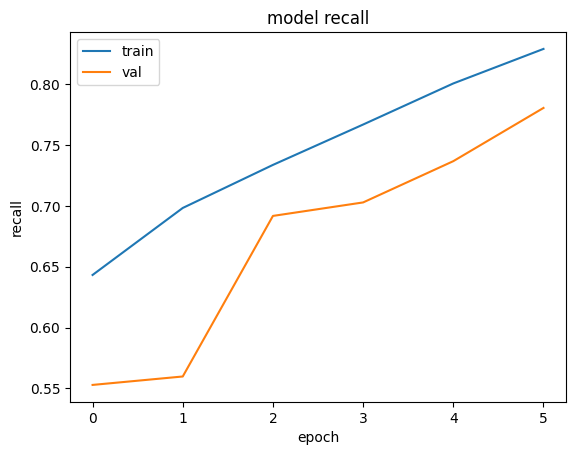

In [175]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])

plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


### F1 Score

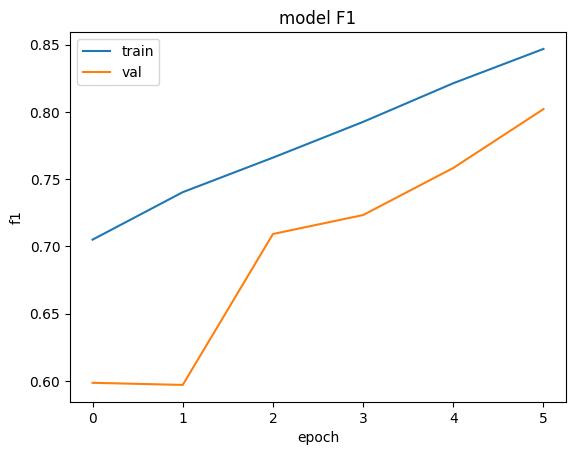

In [176]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


It seems like a very good model. The training and validation shows good results and are both always close to each other. Also the model keeps improving each epoch.

<a id="TE"></a>
## 9.2 - Test Evaluate

Now let's evaluate in the training and in testing dfs.

In [177]:
score_train = model.evaluate(X_ov[:,:20], y_ov, verbose=1)
score_test = model.evaluate(X_test[:,:20], y_test, verbose=1)

527/527 [==============================] - 2s 3ms/step - loss: 0.2981 - acc: 0.8227 - f1_m: 0.8217 - precision_m: 0.8386 - recall_m: 0.8059


In [178]:
score = pd.DataFrame({'Loss':[score_train[0],score_test[0]],
             'Accuracy':[score_train[1],score_test[1]],
             'Precision':[score_train[3],score_test[3]],
             'Recall':[score_train[4],score_test[4]],
             'F1-Score':[score_train[2],score_test[2]]
                     },
             index=['Train Score','Test Score'])

score

,Loss,Accuracy,Precision,Recall,F1-Score
Train Score,0.246187,0.850177,0.869919,0.832443,0.850419
Test Score,0.298116,0.822709,0.838623,0.805918,0.821655


Low Loss but high in the test, good Accuracy, Precision, Recall and F1-score for both data frames. Excellent! :)

<a id="TF"></a>
## 9.3 - Test Function

For the final test we will build a function that puts everything that we learned into context.
 The following function will apply our pipeline for text preprocessing, classify a comment with our model and will return if the comment  is Positive, Negative or Neutral.

Let's see if the model is really accurate in real world comments. 😏

In [179]:
def sentiment_analysis(text, pipeline, model):
    
    # Applying the pipeline
    if type(text) is not list:
        text = [text]
        text_prep = text_prep_pipeline.fit_transform(text)
        text_prep = tokenizer.texts_to_sequences(text_prep)
        matrix = pad_sequences(text_prep, padding='post', maxlen=20)
        # Predicting sentiment
        proba = model.predict(matrix)
    
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    
    if proba.argmax() == 0 :
        text = 'Negative'
        class_proba = int(proba[0][0].round(2)*100)
        color = 'Crimson'
        
    elif proba.argmax() == 1 :
        text = 'Neutral'
        class_proba = int(proba[0][1].round(2)*100) 
        color = 'Lightgrey'
       
    elif proba.argmax() == 2 :
        text = 'Positive'
        class_proba = int(proba[0][2].round(2)*100) 
        color = 'DeepSkyBlue'
        
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()
    

In [180]:
#Positive

comment = "The prices are amazing and the shipping is really fast! Thank for everything ajio!"

1/1 [==============================] - 0s 384ms/step


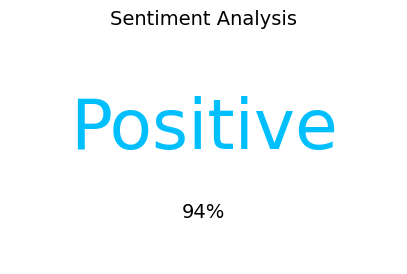

In [181]:
sentiment_analysis(comment, pipeline=text_prep_pipeline,  model=model)

In [182]:
# Negative

comment = "I lost my money. I contact the custom service and they tell to wait receive item but not received yet"

1/1 [==============================] - 0s 21ms/step


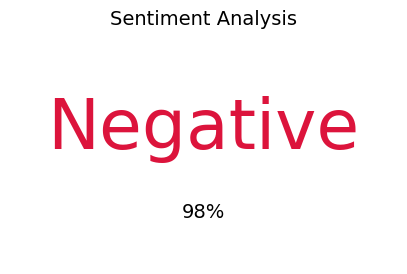

In [183]:
sentiment_analysis(comment, pipeline=text_prep_pipeline, model=model)

In [184]:
# Neutral
comment = "Overall app is ok. But i really want some improvements in the next update."

1/1 [==============================] - 0s 21ms/step


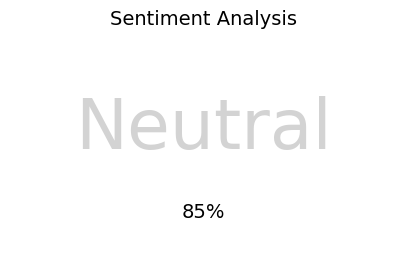

In [185]:
sentiment_analysis(text=comment, pipeline=text_prep_pipeline, model=model)

<a id="CON"></a>
# 10 - Conclusion 

### The conclusion of the project is that the customer care service provided by Ajio is very low. This is a significant issue that needs to be addressed. If Ajio plans to find a solution to improve their customer care service, it will have a positive impact on their sales. By enhancing the customer care service experience, Ajio can increase customer satisfaction, build trust, and foster loyalty, ultimately leading to improved sales performance. Prioritizing customer service improvements can help Ajio differentiate itself from competitors and create a positive reputation in the market.


 ## In this project, the focus is not limited to the Ajio app specifically. The project can be applied to any app by copying the App Store and Play Store ID of the respective app. By doing so, the project can analyze the app's reviews and provide insights into the problems or issues users are facing with the app. This approach allows for a comprehensive assessment of the app's performance and user satisfaction, enabling the identification of areas for improvement. The project's findings can be utilized to enhance the app's features, functionality, and overall user experience, leading to better customer satisfaction and potentially increased usage and sales.